In [48]:
import joblib
import numpy as np

#load neural network
neuralNetwork = joblib.load("neuralNetwork.pkl")
X_scaler = joblib.load("X_scaler.pkl")
y_scaler = joblib.load("y_scaler.pkl")


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv("../scans/scan7/scan7Clean.csv.zip")
X = df.loc[:, ['RotTrans', 'axLenght', 'max_elong']]
y = df.loc[:, ['nfp', 'rc1', 'zs1', 'eta']]

# select nfp
nfp=3 #0 for all nfp
if (nfp != 0):
    df = df[df['nfp'] == nfp]

X = df.loc[:, ['RotTrans', 'axLenght', 'max_elong']]
X_scaled = X_scaler.transform(X)
y = df.loc[:, ['nfp', 'rc1', 'zs1', 'eta']]
y_scaled = y_scaler.transform(y)

# Split training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X_scaled, y_scaled, test_size=0.1, train_size=0.9,
                     random_state=0)

/home/exxxx5/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The Result was:
nfp=3, rc1=0.23631116820590922, zs1=-0.20224418433204217, etabar=-1.9154168736165689

Predicted iota: 1.4994900421879975
Asked iota:     1.5

Predicted axis_length: 7.548227439991988
Asked axis_length:     1.2

Predicted max_elongation: 5.866504922767136
Asked max_elongation:     6


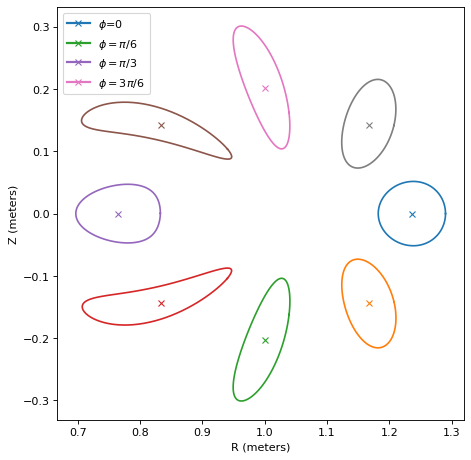

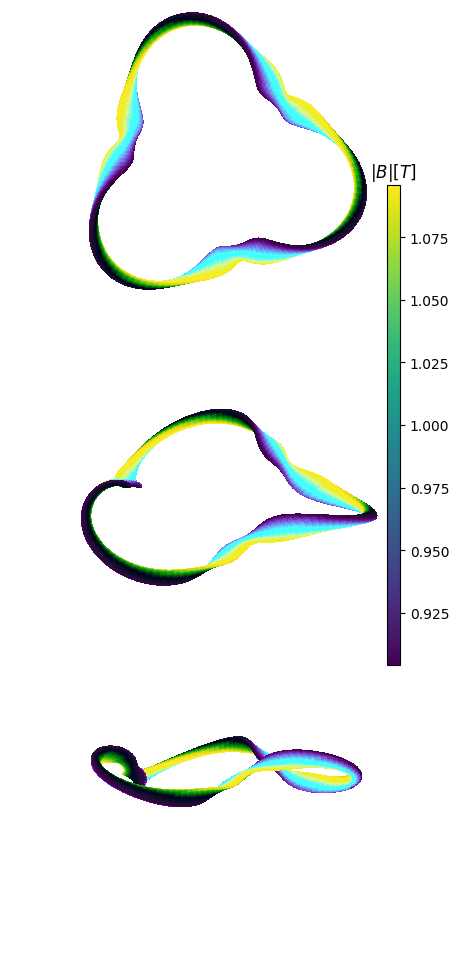

In [50]:
from qsc import Qsc
#testData -> iota, axis_Length, max_elongation
testData = [[1.5, 1.2, 6]]
testData_scaled = X_scaler.transform(testData)
#predict
predicted = neuralNetwork.predict(testData_scaled)
nfp, rc1, zs1, etabar = y_scaler.inverse_transform(predicted)[0]
nfp = int(np.round(nfp))
print(f"The Result was:\nnfp={nfp}, rc1={rc1}, zs1={zs1}, etabar={etabar}\n")

stel = Qsc(rc=[1,rc1],zs=[0,zs1],nfp=nfp,etabar=etabar)
print('Predicted iota:', stel.iota)
print('Asked iota:    ', testData[0][0])
print('')
print('Predicted axis_length:', stel.axis_length)
print('Asked axis_length:    ', testData[0][1])
print('')
print('Predicted max_elongation:', stel.max_elongation)
print('Asked max_elongation:    ', testData[0][2])
stel.plot_boundary(r=0.05)

test stats:
r2:  0.7308225615795099
mse:  0.019274036196586505

training stats:
loss:  0.009809257962960147
validationScore:  0.7299928905055406


Text(0, 0.5, 'Actual')

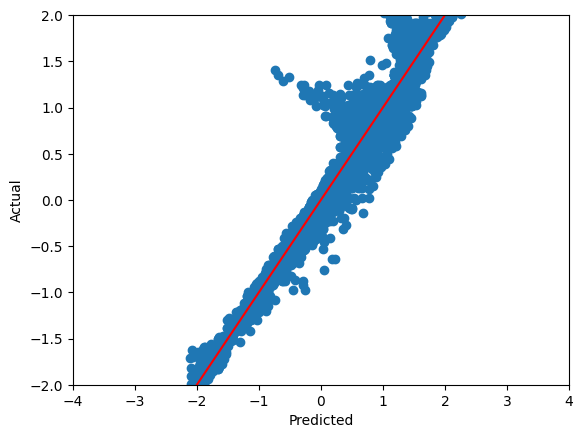

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
Y_NN = neuralNetwork.predict(X_test)
print("test stats:")
print("r2: ", r2_score(y_test, Y_NN))
print("mse: ", mean_squared_error(y_test, Y_NN))
print("\ntraining stats:")
print("loss: ", neuralNetwork.loss_)
print("validationScore: ", neuralNetwork.best_validation_score_)
plt.scatter(np.ravel(Y_NN),np.ravel(y_test))
plt.axline([0, 0], [1, 1], color='red')
plt.ylim(-2, 2)
plt.xlim(-4, 4)
plt.xlabel('Predicted')
plt.ylabel('Actual')